## CAPSTONE PROJECT - Battle of Neighbourhoods

## Problem & Background

#### Question – “Can you recommend the  right location in Toronto to open an Indian culinary  items store?”

#### Problem – Suggest the best possible location to open a new retail store in Toronto for selling Indian culinary items 
#### Introduction
A discussion with the Customer on the line of business and background throws the following light – 
1. Primary business goal of the chain in this year is to enter Toronto with a small size retail outlet
2. Their business involves selling Indian culinary items which ranges from groceries - rice, pulses to spices.
3. They envision that the right place to open such a retail store would be around Indian /Asian neighbourhoods in Toronto
4. Though they feel neighbourhood store concept would be perfect, they do not mind if the store centres around shopping places as they feel having restaurants or shopping places in the vicinity may improve visibility for them
5. Distance from any import hub for items or their warehouse  is not a part of their analysis. Though what is important to them could be the proximity from their prospective customers as they may want to provide a home delivery service through their app in a limited radius
6. This whole exercise will be like their test run. As they have a significant budget to expand they would also want to think on the lines of service delivery and customer stickiness so as to expand to other items from India beyond culinary area. Also store rentals/buy prices are not considered as part of the analysis.

## Data Required

The data required for this analysis with examples is provided below

1.	Geography and location information of the neighbourhoods. E.g. latitude, longitude, postal codes. We will use https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, for the postal codes and either Geocoder or the following csv file for the postal codes http://cocl.us/Geospatial_data . Read/Queried data would look as below 


2. Demographics of the neighbourhoods - for this analysis we will use the data available in the following Toronto Open Data site https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a CSV file - https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv . Note that here we will limit our analysis to the neighbourhoods of the postal codes available. Queried demographic data from the csv file will look as below
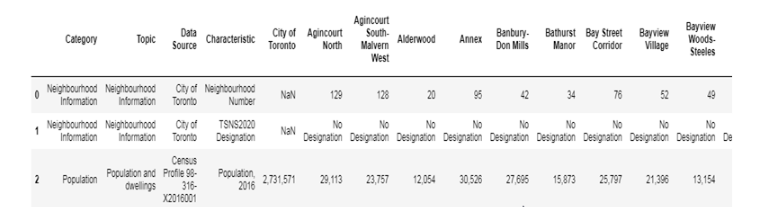

3. We would need venue information in that neighbourhood which could provide us details like restaurants nearby, shopping areas, distances and popularity. For this we will leverage Foursquare data. The type of venue categories we would look at are Indian/Asian restaurants, Food, Shops and service, Travel and transport.  Examples from Foursquare resource categories  are Indian Restaurant - 4bf58dd8d48988d10f941735, Shop & Service - 4d4b7105d754a06378d81259. For examples Indian restaurants near Scarborough Village queries for, will look as below
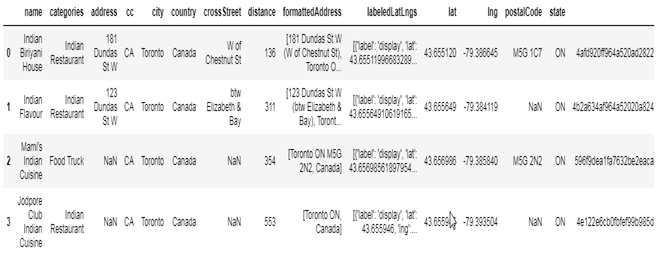

## Methodology  

We will use a content (venue) based recommendation model as the problem asks us to recommend a particular location. 
To build the same we will use a reference priority rating of neighborhoods using the population parameter. This reference provides us the priority of neighborhoods based on customers input as customer wants to open the store in a neighborhood location with higher asian population. We consider South Asian population (esp Indian population).
Thus we order neighborhoods with a higher South Asian population with a higher priority or preference rating. 


Additionally the Foursquare venue categories i.e. BusStop, Shops and services, Metro stations and Indian Restaurants will be used to provide a weighted order of importance of the "venues" metric i.e. which type of venues do we consider as most important - presence of Bus stops or Metro or Shops and service or Indian restaurant - which ones are most co-related.

And based on number of such nearby venues available for each of the neighborhood locations (output of Foursquare API search) we will determine the top preferred location among the available neighborhoods.

Following diagram explains the methodology and Machine Learning recommendation component used

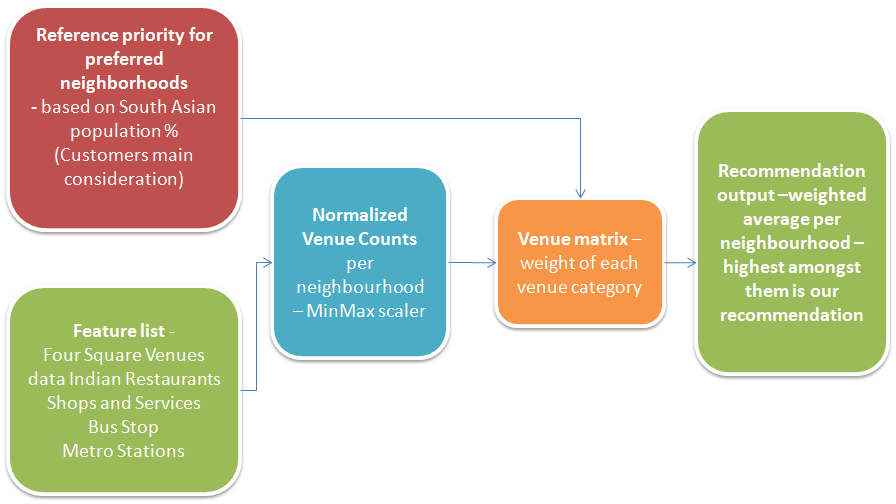

To normalize the South Asian population of neighborhoods we will use the percentage of South Asian population for each neighborhood.
Below is a screenshot of the top 20 neighborhoods in the order of the South Asian population %.
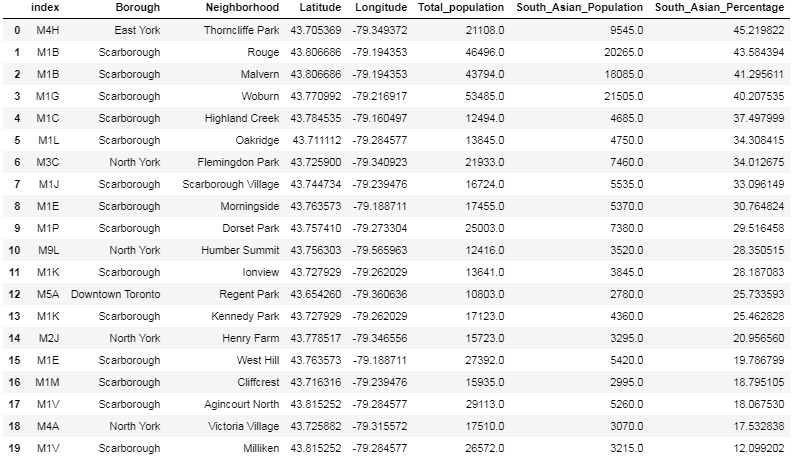

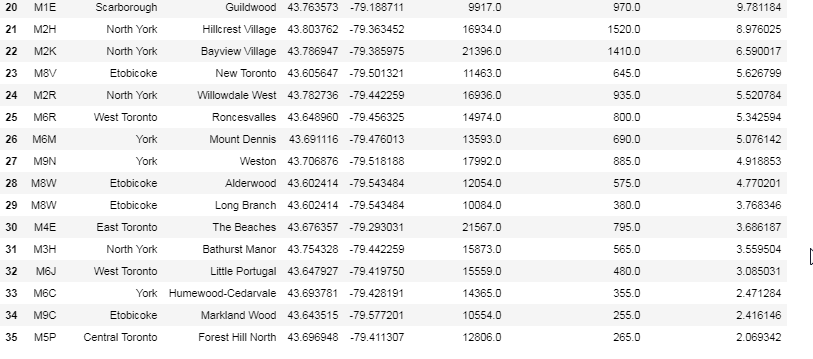

We will create a neighborhood preference metric from the customer inputs. Since customer priority is Indian neighborhood we will assign a rating range or priority based on the South Asian population (mainly Indian population) to the neighborhoods. Our reference priority matrix would look as below - this will be used as the customer priority of neighborhoods to eventually provide the recommendation based on the venues nearby and the importance of the 'venue type' (bus stop, indian restaurant, shops and service, metros) metric.

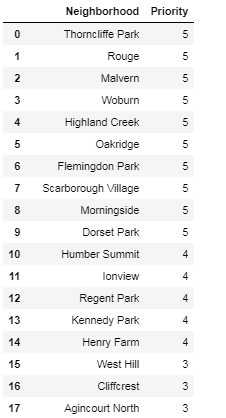

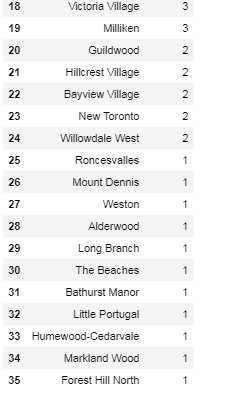

### Four Square data fetched (head)

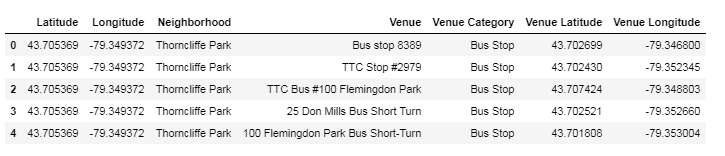

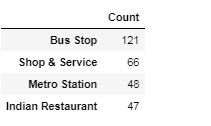

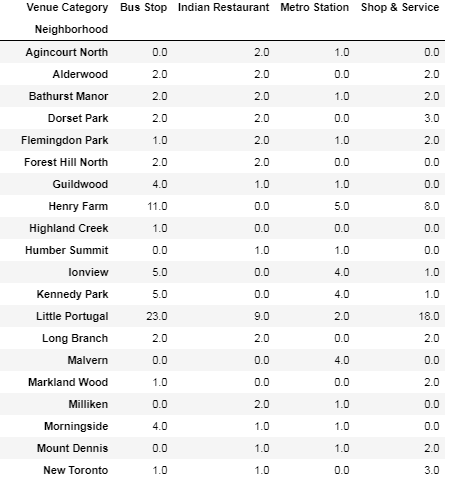

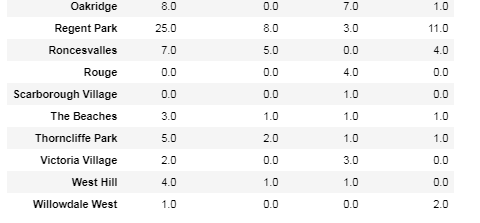

## Data Analysis

Describing the general statistics. We have used a limit of 30 venues per neighborhood location.
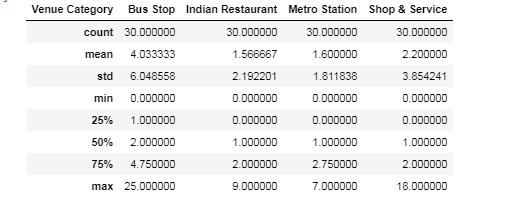

Venue data types
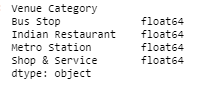

Pearson correlation output is shown below. 

As we can see Bus stop, Indian Restaurant, Shops and service have a high pearson coefficient > 75% and a p-value < 0.001.
By standards, p-value < 0.001 shows that the co-relation among these is highly significant.
We can see that Metro station has a very low Pearson correlation (0.33, -0.14, 0.13)


It clearly shows Busstop, Indian Restaurant and Shops and service are highly co-related

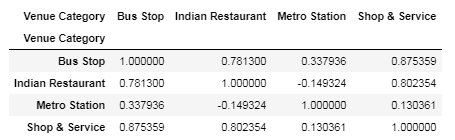

The p-values also show that Bus stops, Indian Restaurants and Shop & Services are also statistically significant
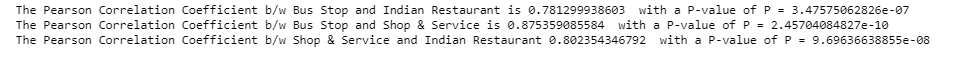

Finally for the recommendation we will normalize the values using Min-max scaler method which gives us the below. This normalization will bring the venue types and counts to the levels for correct analysis.

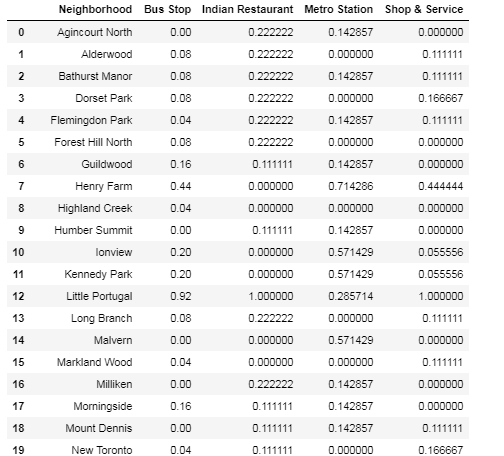

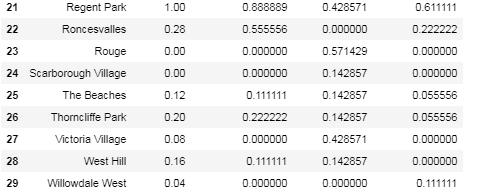

Merging this information on a single table we have the neighborhood, its corresponding reference priority and the normalized value of venue count for each type of venue in the neighborhood.

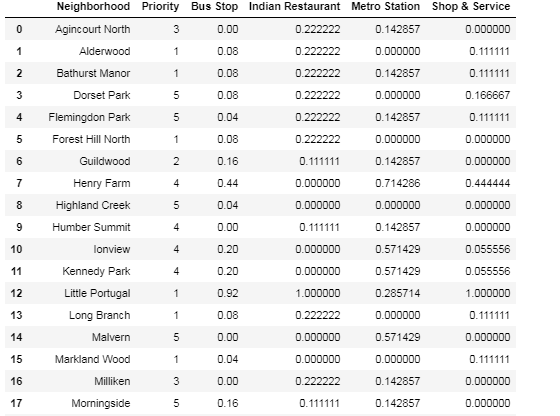

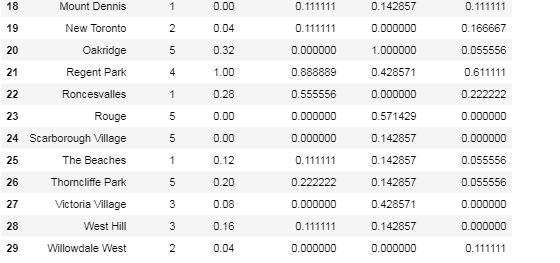

The above leads us to calculating the weighted venue matrix which is calculated using a dot product to get weight each venue type category per the reference priorities

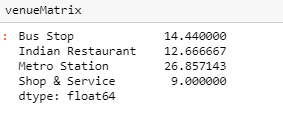

## Results

Using the above priority matrix and weights the final recommendation is calculated by calculating the weighted average for every neighborhood. The highest priority or rating here will be our recommendation as it would have taken care of customer preference as well as the content/no. of venues and their weighted measure.
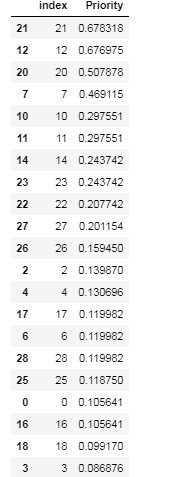

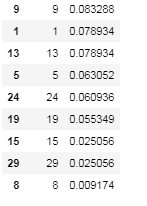

With the max priority as seen above is 0.678 followed by 0.676. These correspond to Neighborhoods "Regent Park" and "Little Portugal" respectively.

This can also be seen from the fact that both these neighborhoods have a high number of bus stops and shops and service, with almost same number of nearby Indian restaurants (as shown below). But if you go above and note the population percentage of South Asians, Regent Park has ~25.7% South asian population compared to only ~3.1% in Little Portugal.

Thus I would recommend the location "Regent Park" neighborhood as the ideal place to open the Indian culinary items store.

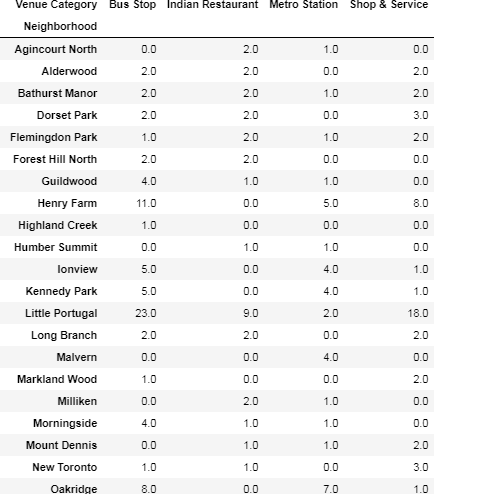

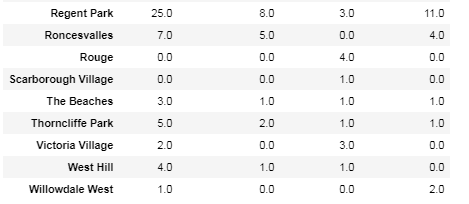

## Discussion

In this analysis we have restricted venue data within a 500m radius and 30 venues. While that is a factor, few more important parameters for consideration and better analysis will be - 

1. real estate/store rental or buy prices of the neighborhoods
2. proximity or distance from warehouse and the decided supply chain strategy for delivery from any import unit or warehouse

While we have excluded these assuming a no-restriction on budget, the above will definitely be significant criterions for the store location prediction.

## Conclusion

The customer should open the culinary items store in "Regent Park" nieghborhood in Toronto. This has been suggested based on the analysis of the key data points of South Asian population concetration and vicinity of various venues like Indian Restaurants, Shops and Bus stops.
Because of proximity to Indian Restaurants, the customer can explore tie-ups or partnerships for the restaurants culinary requirements in bulk. Also availability of Bus stops and Shops and Services provides the customer's store with relevant eyeballs and the customer can look at easier access to delivery.
As expected by the customer on the test run, I suggest a six-month test run with a shop on rental basis to start with and the existing store items catalogue, to gauge the sales and returns of the business.